In [15]:
%config Completer.use_jedi = False

In [16]:
import autorootcwd
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import medfilt
from scipy.ndimage import gaussian_filter
import matplotlib.dates as mdates

# 파일 경로 및 파라미터 ： 2분동안 수집한 csi 신호 (1개 device(num8 esp32), 52 subcarrier)
NO_ACTIVITY_CSI_PATH = r"data\raw\raw_noActivity_csi\merged_csi_data_noactivity.csv" 
ACTIVITY_CSI_PATH = r"data\raw\raw_activity_csi\merged_csi_data_dooropen.csv" 

# 파라미터 
FRAME_NUM = 500 # 6초
SUBCARRIER_NUM = 52 # subcarrier 개수 (52로 고정)
WIN_SIZE = 64


In [17]:
def convert_csi_to_amplitude(file_path, SUBCARRIER_NUM=52): # src/utils.py
    """
    Convert CSI data to amplitude.
    :param file_path: Path to the CSV file containing CSI data.
    :param SUBCARRIER_NUM: Number of subcarriers (default = 52)

    Example usage:
    NO_ACTIVITY_CSI_PATH = r"data\Raw_CSI_To_CSV_NoActivity\merged_csi_data_noactivity.csv" 
    amp, ts = convert_csi_to_amplitude(NO_ACTIVITY_CSI_PATH, SUBCARRIER_NUM) # amp: signal amplitude, ts: timestamp
    :return: Tuple of amplitude and timestamp arrays.
    """
    df = pd.read_csv(file_path, parse_dates=['timestamp'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], format="%H:%M.%S")

    I   = df[[f"I{i}" for i in range(SUBCARRIER_NUM)]].values
    Q   = df[[f"Q{i}" for i in range(SUBCARRIER_NUM)]].values
    amp = np.sqrt(I**2 + Q**2)
    ts  = df['timestamp']

    return amp, ts


In [18]:
def plot_csi_amplitude(amp, time_stamp, title='None', FRAME_NUM=500, SUBCARRIER_NUM=52): # src/utils.py
    """
    Loads CSI data, calculates amplitude, and plots it.
    param amp : signal amplitude 
    param time_stamp : 
    
    Example usage : 
    amp , time_stamp = convert_csi_to_amplitude(_, _)
    """
    N = min(FRAME_NUM, len(amp))
    tick_spacing = 10
    ts = time_stamp[:N]

    plt.figure(figsize=(12,6))
    if amp.ndim == 2 : 
        for i in range(SUBCARRIER_NUM):
            plt.plot(ts, amp[:N, i], alpha=0.6)
    else : 
        plt.plot(ts, amp[:N, ], alpha=0.6)

    plt.title(title)
    plt.xlabel("Timestamp")
    plt.ylabel("Amplitude") 
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%M:%S.%f'))
    plt.xticks(ts[::tick_spacing], rotation=45)
    plt.tight_layout()
    plt.show()
    plt.close()
    return

0      2025-05-21 14:20:01.206
1      2025-05-21 14:20:01.216
2      2025-05-21 14:20:01.226
3      2025-05-21 14:20:01.236
4      2025-05-21 14:20:01.246
                 ...          
9211   2025-05-21 14:22:03.676
9212   2025-05-21 14:22:03.686
9213   2025-05-21 14:22:03.696
9214   2025-05-21 14:22:03.706
9215   2025-05-21 14:22:03.716
Name: timestamp, Length: 9216, dtype: datetime64[ns]


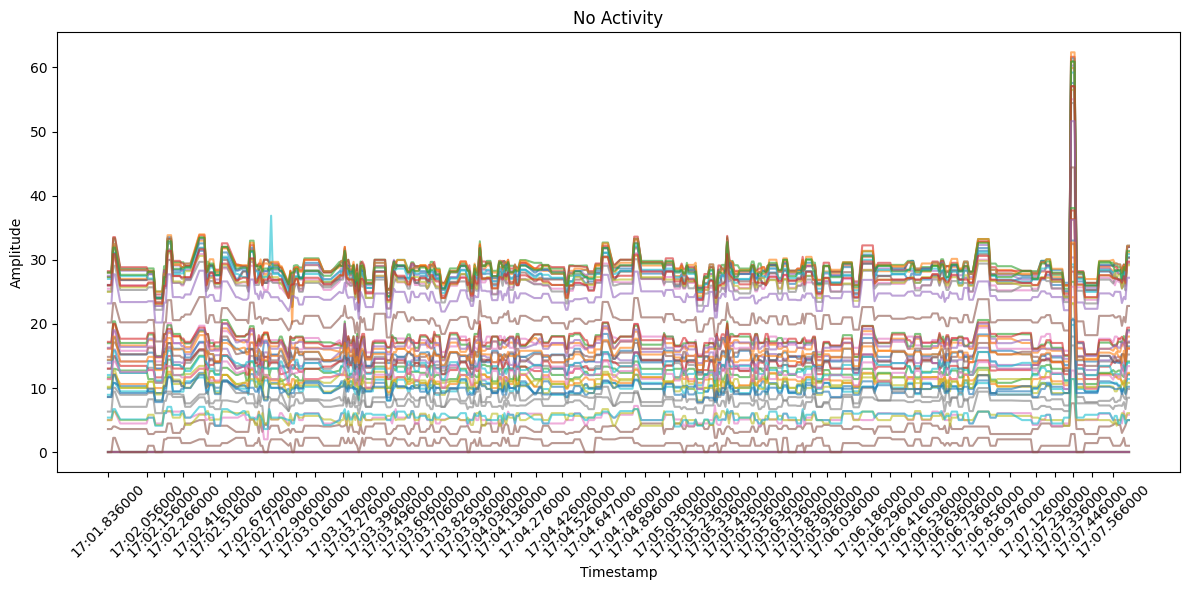

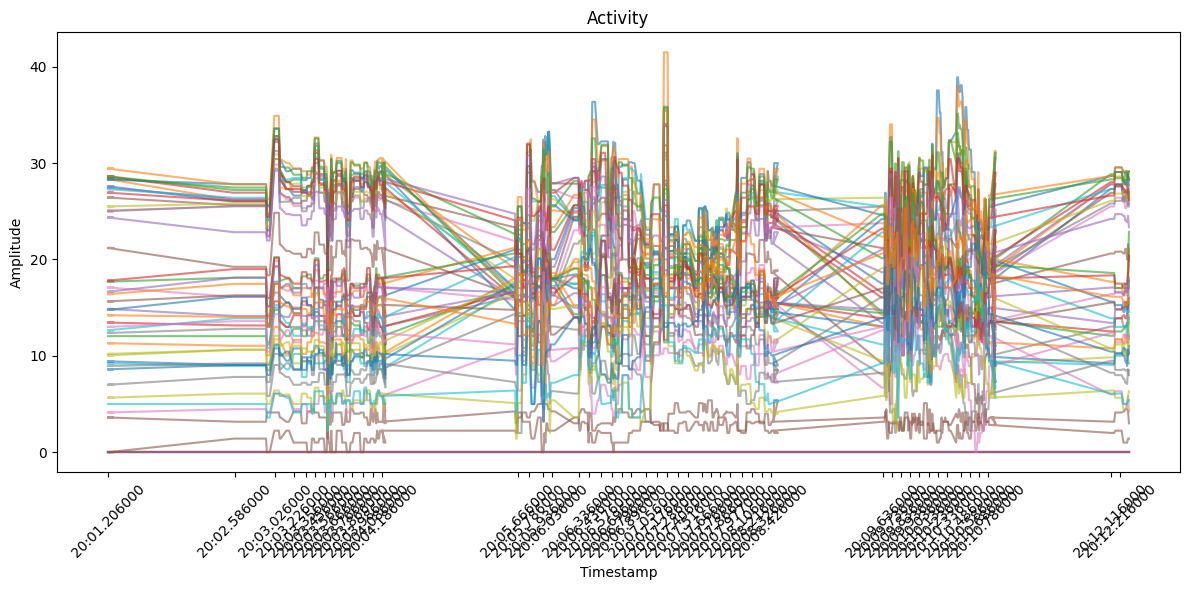

In [20]:
amp_no_activity, ts_no_activity = convert_csi_to_amplitude(NO_ACTIVITY_CSI_PATH, SUBCARRIER_NUM)
amp_activity, ts_activity = convert_csi_to_amplitude(ACTIVITY_CSI_PATH, SUBCARRIER_NUM)
print(ts_activity)
plot_csi_amplitude(amp_no_activity, ts_no_activity, title='No Activity')
plot_csi_amplitude(amp_activity, ts_activity, title='Activity')